In [89]:
%matplotlib inline

In [90]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [91]:
df = pd.read_csv('~/Downloads/world_countries.csv')
df.head()

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,ALB,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,DZA,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,ASM,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,AND,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [92]:
df.columns

Index(['Country', 'Code', 'Region', 'Population', 'Area', 'Pop. Density',
       'Coastline', 'Net migration', 'Infant mortality', 'GDP', 'Literacy',
       'Phones', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

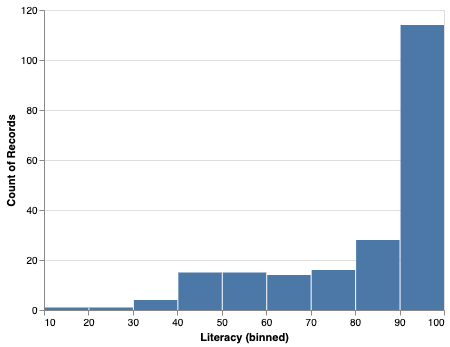

In [93]:
# Q-1: What is the range of values for the tallest bar when creating a histogram of the literacy rate? 
alt.Chart(df).mark_bar().encode(
    alt.X('Literacy', bin=True), 
    y='count()',
    tooltip='count()')

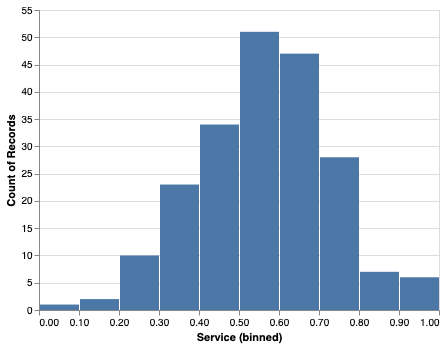

In [94]:
# Q-2: What is the range of values for the tallest bar when creating a histogram 
# of the fraction of the economy due to service? 
alt.Chart(df).mark_bar().encode(
    x=alt.X('Service', bin=True),
    y='count()',
    tooltip='count()'
)

In [95]:
# Q-3: Approximately how many countries (to the nearest 5) have
# between 90% and 100% of their economy based on service? 
int(len(df.query('Service >= 0.9'))/5)*5

5

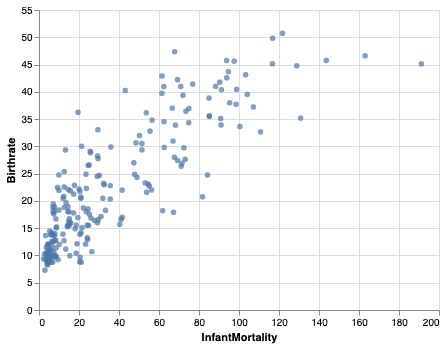

In [96]:
# Note to self: pandas 0.24.0 had a bug fixed in 0.24.1
# https://github.com/pandas-dev/pandas/issues/25078
df['InfantMortality'] = df['Infant mortality']
alt.Chart(df).mark_circle().encode(
    alt.X('InfantMortality'),
    alt.Y('Birthrate')
)

In [97]:
df['Infant mortality'] = df['Infant mortality'].astype(float)

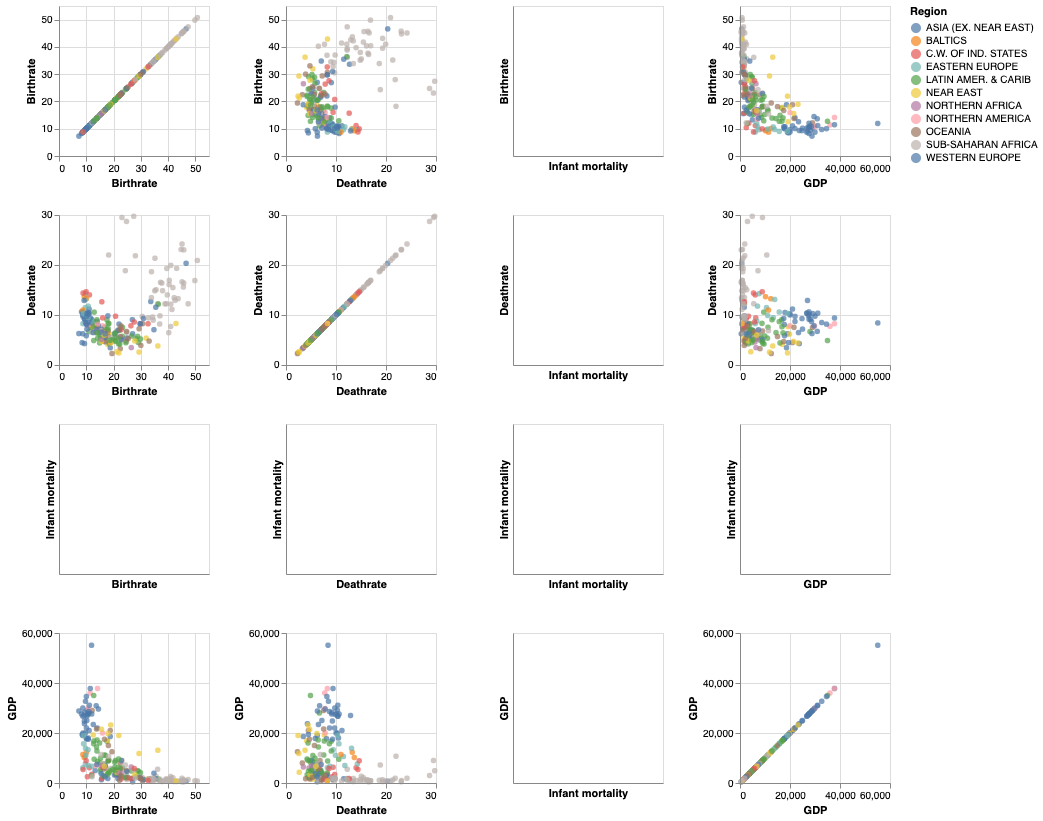

In [98]:
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Region:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Birthrate', 'Deathrate', 'Infant mortality', 'GDP'],
    column=['Birthrate', 'Deathrate', 'Infant mortality', 'GDP']
)#.interactive()

In [99]:
# What are the top 10 countries by GDP?
df.sort_values('GDP', ascending=False).head(10)

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,InfantMortality
120,Luxembourg,LUX,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,...,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860,4.81
152,Norway,NOR,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,...,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564,3.70
212,United States of America,USA,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787,6.50
22,Bermuda,BMU,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,...,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890,8.53
38,Cayman Islands,CYM,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,...,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954,8.19
175,San Marino,SMR,WESTERN EUROPE,29251,61,479.5,0.00,10.98,5.73,34600.0,...,16.67,0.00,83.33,NaN,10.02,8.17,NaN,NaN,NaN,5.73
194,Switzerland,CHE,WESTERN EUROPE,7523934,41290,182.2,0.00,4.05,4.39,32700.0,...,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645,4.39
54,Denmark,DNK,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,...,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735,4.56
92,Iceland,ISL,WESTERN EUROPE,299388,103000,2.9,4.83,2.38,3.31,30900.0,...,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765,3.31
12,Austria,AUT,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678,4.66


In [100]:
# What are the top 20 countries by population?
df.sort_values('Population', ascending=False).head(20)

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,InfantMortality
42,China,CHN,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,...,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403,24.18
93,India,IND,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,...,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538,56.29
212,United States of America,USA,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787,6.50
94,Indonesia,IDN,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,...,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,35.60
27,Brazil,BRA,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,...,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516,29.61
154,Pakistan,PAK,ASIA (EX. NEAR EAST),165803560,803940,206.2,0.13,-2.77,72.44,2100.0,...,27.87,0.87,71.26,1.0,29.74,8.23,0.216,0.251,0.533,72.44
16,Bangladesh,BGD,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,...,62.11,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603,62.60
167,Russia,RUS,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,...,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575,15.39
150,Nigeria,NGA,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,...,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,98.80
102,Japan,JPN,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,...,12.19,0.96,86.85,3.0,9.37,9.16,0.017,0.258,0.725,3.26


In [101]:
# What are the 10 countries with the largest net migration?
df.sort_values('Net migration', ascending=False).head(10)

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,InfantMortality
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,163.07
38,Cayman Islands,CYM,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,...,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954,8.19
164,Qatar,QAT,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,...,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197,18.61
110,Kuwait,KWT,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,...,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516,9.95
206,Turks & Caicos Islands,TCA,LATIN AMER. & CARIB,21152,430,49.2,90.47,11.68,15.67,9600.0,...,2.33,0.00,97.67,2.0,21.84,4.21,NaN,NaN,NaN,15.67
182,Singapore,SGP,ASIA (EX. NEAR EAST),4492150,693,6482.2,27.85,11.53,2.29,23700.0,...,1.64,0.00,98.36,2.0,9.34,4.28,0.000,0.339,0.661,2.29
175,San Marino,SMR,WESTERN EUROPE,29251,61,479.5,0.00,10.98,5.73,34600.0,...,16.67,0.00,83.33,NaN,10.02,8.17,NaN,NaN,NaN,5.73
6,Anguilla,AIA,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,...,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,21.03
28,British Virgin Is.,VGB,LATIN AMER. & CARIB,23098,153,151.0,52.29,10.01,18.05,16000.0,...,20.00,6.67,73.33,2.0,14.89,4.42,0.018,0.062,0.920,18.05
151,Northern Mariana Islands,MNP,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,...,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN,7.11


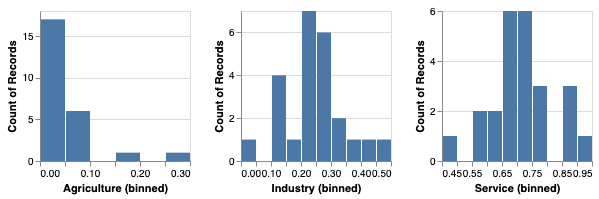

In [102]:
# What is the distribution of Argiculture, Industry, and service for the countries in Western Europe?
df_europe = df.query('Region == "WESTERN EUROPE"')
alt.Chart(df_europe).mark_bar().encode(
    alt.X(alt.repeat('column'), type='quantitative', bin=True),
    alt.Y('count()')
).properties(
    width=150,
    height=150
).repeat(
    column=['Agriculture', 'Industry', 'Service']
)

In [103]:
# What are the names, population and Area of the 5 largest (by area) landlocked countries?
df.query('Coastline == 0').sort_values('Area', ascending=False)[['Country', 'Population', 'Area']].head(5)

,Country,Population,Area
105,Kazakhstan,15233244,2717300
45,"Congo, Dem. Rep.",62660551,2345410
138,Mongolia,2832224,1564116
40,Chad,9944201,1284000
149,Niger,12525094,1267000


In [104]:
# What are the names and population of the five most populous landlocked countries?
df.query('Coastline == 0').sort_values('Population', ascending=False)[['Country', 'Population', 'Area']].head(5)

,Country,Population,Area
65,Ethiopia,74777981,1127127
45,"Congo, Dem. Rep.",62660551,2345410
0,Afghanistan,31056997,647500
144,Nepal,28287147,147181
208,Uganda,28195754,236040


In [105]:
# What is the name and GDP of the 10 countries with the most cell phones/1000 people?
df.sort_values('Phones', ascending=False)[['Country', 'Phones', 'GDP']].head(10)

,Country,Phones,GDP
137,Monaco,1035.6,27000.0
212,United States of America,898.0,37800.0
77,Gibraltar,877.7,17500.0
22,Bermuda,851.4,36000.0
84,Guernsey,842.4,20000.0
38,Cayman Islands,836.3,35000.0
103,Jersey,811.3,24800.0
193,Sweden,715.0,26800.0
175,San Marino,704.3,34600.0
172,Saint Pierre & Miquelon,683.2,6900.0


In [106]:
# What are the 10 “Wet Tropical” countries with the highest GDP?
WET_TROPICAL = 2
df.query(f'Climate == {WET_TROPICAL}').sort_values('GDP', ascending=False)[['Country', 'GDP']].head(10)

,Country,GDP
22,Bermuda,36000.0
38,Cayman Islands,35000.0
90,Hong Kong,28800.0
10,Aruba,28000.0
182,Singapore,23700.0
196,Taiwan,23400.0
82,Guam,21000.0
121,Macao,19400.0
29,Brunei Darussalam,18600.0
71,French Polynesia,17500.0
